Исходная координата курьера = (17, 99)

Точки доставки = [(99, 48), (75, 90), (23, 29), (23, 96), (73, 11), (91, 88), (25, 50), (3, 69)]

Конечная координата курьера = (3, 69)



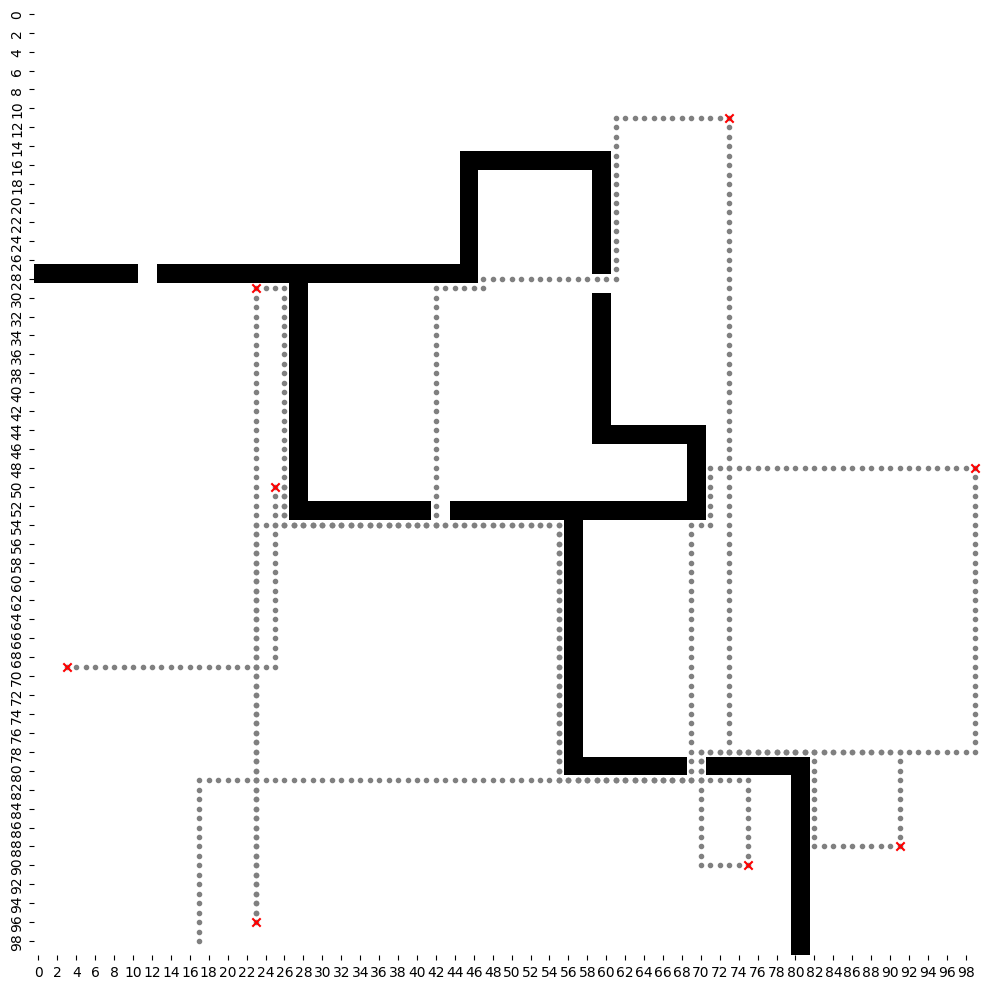

In [45]:
from collections import deque
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

url='city_map.csv' # Импортируем исходную карту
df = pd.read_csv(url, names=list(range(0, 100, 1)))
city_map_list = df.values.tolist()

courier_location = (17, 99) # Пример исходной координаты курьера
orders_location = [(99, 48), (75, 90), (23, 29), (23, 96), (73, 11), (91, 88), (25, 50), (3, 69)] # Пример точек доставки
route = []

def find_shortest_path(matrix, s, t):
    n = len(matrix)
    m = len(matrix[0])
    
    visited = [[False] * m for cell in range(n)] # Создаем матрицу для отслеживания посещенных клеток
    
    parent = [[None] * m for cell in range(n)] # Создаем матрицу для хранения предыдущих клеток
    
    queue = deque() # Создаем очередь элементов для проверки
    queue.append(s)
    visited[s[0]][s[1]] = True
    
    delta = [(-1, 0), (1, 0), (0, -1), (0, 1)] # Создаем список смещений для проверки соседних клеток
    
    while len(queue) != 0:
        x, y = queue.popleft()
        
        for dx, dy in delta:
            nx = x + dx
            ny = y + dy
            
            if 0 <= nx < n and 0 <= ny < m: # Проверяем, что клетка находится в пределах матрицы
                if not visited[nx][ny] and matrix[nx][ny] == 1: # Проверяем, что клетка еще не была посещена и не является препятствием
                    queue.append((nx, ny))
                    visited[nx][ny] = True
                    parent[nx][ny] = (x, y)
                    
                    if (nx, ny) == t: # Проверяем клетку на то, является ли она искомой
                        path = []
                        while (nx, ny) != s: # Если True, то сохраняем путь и завершаем поиск
                            path.append((ny, nx))
                            nx, ny = parent[nx][ny]
                        path.reverse() # Путь необходимо инвертировать, т.к. мы собираем его с конца
                        return path
    
    return None # Возвращаем None, если путь до искомой точки был не найден
    
for i in range(len(orders_location)): # Итерируем по списку кортежей с точками доставок
    tj, ti = orders_location[i] # Меняем местами координаты для соответствия матрице
    target = (ti, tj)
    if i == 0: # Используем исходную позицию для начала пути
        sj, si = courier_location
        start = (si, sj)
        route.extend(find_shortest_path(city_map_list, start, target))
    else:
        sj, si = route[-1] # На следующих итерациях заменяем исходную точку на
        start = (si, sj) # текущее местоположение
        route.extend(find_shortest_path(city_map_list, start, target)) # Добавляем вновь полученный отрезок пути к общему пути

def visualize_path(matrix, path, delivery_points):
    df = pd.DataFrame(matrix)
    myColors = ((0.0, 0.0, 0.0, 1.0), (1.0, 1.0, 1.0, 1.0))
    cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
    plt.figure(figsize = (10, 10))
    sb.heatmap(df, cmap=cmap, cbar=False, square=True) # Создаем визуализацию локации с помощью тепловой карты

    for x, y in path: # Отмечаем путь на тепловой карте
        plt.scatter(x+0.5, y+0.5, c='grey', marker='.')

    for x, y in delivery_points:
        plt.scatter(x+0.5, y+0.5, c='red', marker='x')
    
    plt.gca()
    plt.show()

print(f'Исходная координата курьера = {courier_location}\n')
print(f'Точки доставки = {orders_location}\n')
print(f'Конечная координата курьера = {orders_location[-1]}\n')

visualize_path(city_map_list, route, orders_location)